# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

* Xavier Jeanmonod
* Adrian Baudat
* Simon Wicky

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from matplotlib.lines import Line2D
import epidemics_helper
from epidemics_utility import *
from random import choice

with open("../data/nyc_augmented_network.json", 'r') as file:
    dict_network = json.load(file)
    
G = nx.Graph()
for node in dict_network["nodes"]:
    G.add_node(node["id"], id=node["id"], coordinates=node["coordinates"])
    
for edge in dict_network["links"]:
    G.add_edge(edge["source"], edge["target"])
    
pos = {}  
for node in G.nodes(data=True):
    pos[node[0]] = (node[1]["coordinates"][0],node[1]["coordinates"][1])
    
legend_elements = [Line2D([0], [0], marker = 'o', color='w', markerfacecolor='b', markersize=20, label='Susceptible'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=20, label='Infected'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=20, label='Recovered/Dead')]
#Starting from here, the graph is ready


In [18]:
MAX_DAYS = 100
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=MAX_DAYS)

Epidemic stopped after 108.40 days | 108.40 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


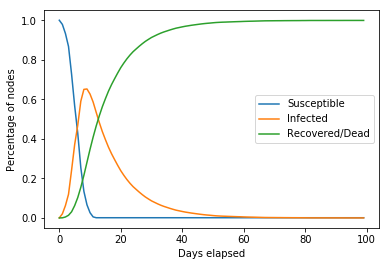

First day where 60%+ of the population is infected : 8
First day where 60%+ of the population is dead : 15


In [19]:
lists = status_list(MAX_DAYS, sir)

list_susceptible = lists[0]
list_infected = lists[1]
list_recovered = lists[2]
    
#The list at index t contain the nodes susceptible/infected/recovered at time t

#Plotting the percentage
nb_susceptible = list(map(lambda x : len(x) / len(G.nodes), list_susceptible))
nb_recovered = list(map(lambda x : len(x) / len(G.nodes), list_recovered))
nb_infected = list(map(lambda x : len(x) / len(G.nodes), list_infected))



plt.plot(nb_susceptible, label="Susceptible")
plt.plot(nb_infected, label="Infected")
plt.plot(nb_recovered, label="Recovered/Dead")
plt.xlabel("Days elapsed")
plt.ylabel("Percentage of nodes")
plt.legend()
plt.show()


#Finding the first occurence of a value > 0.6
print("First day where 60%+ of the population is infected : " 
      + str(nb_infected.index(next(i for i in nb_infected if i > 0.6))))
print("First day where 60%+ of the population is dead : " 
      + str(nb_recovered.index(next(i for i in nb_recovered if i > 0.6))))

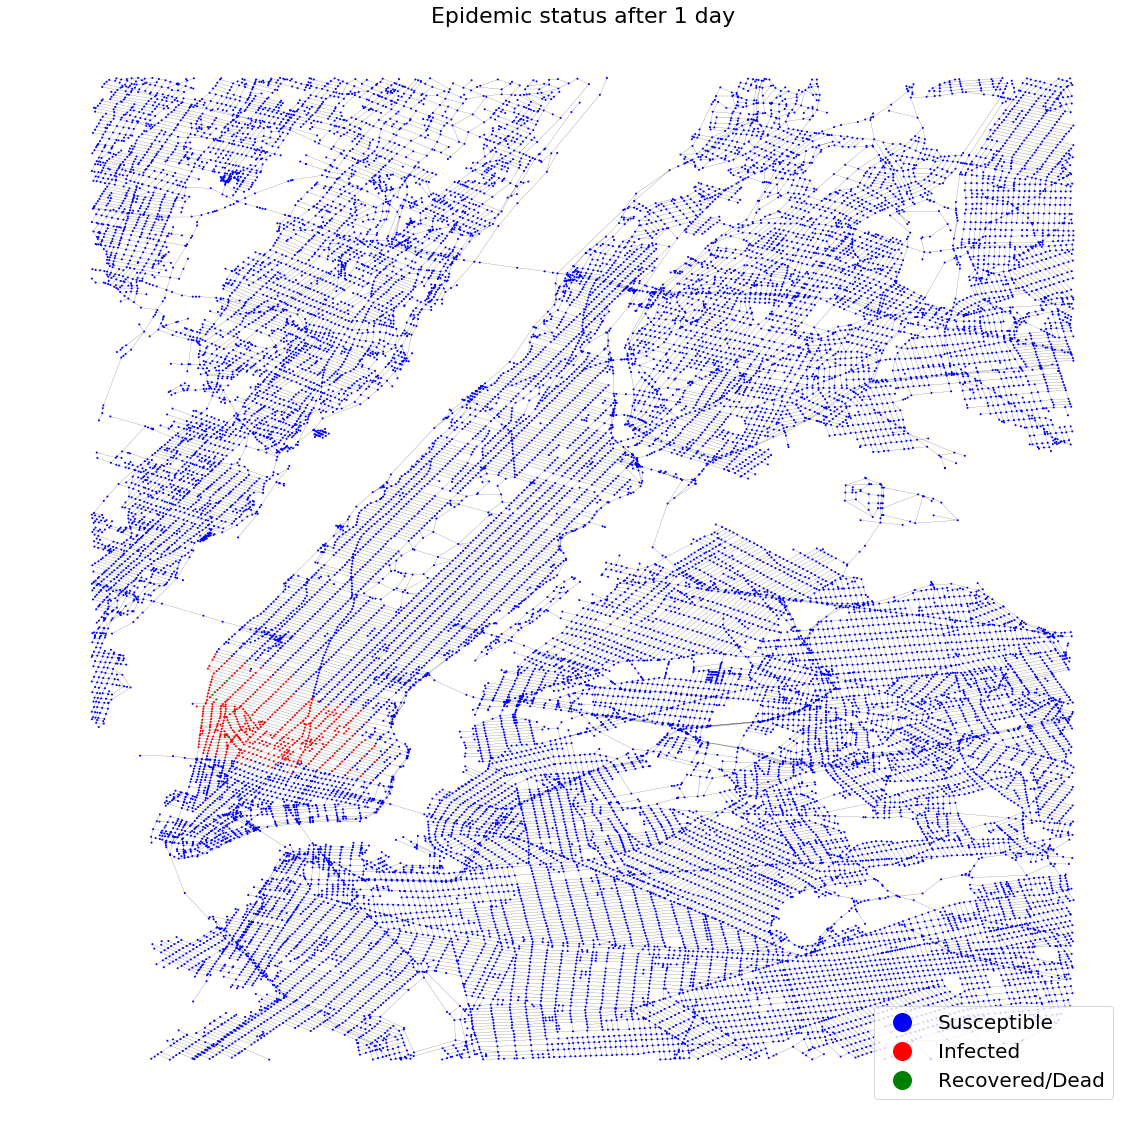

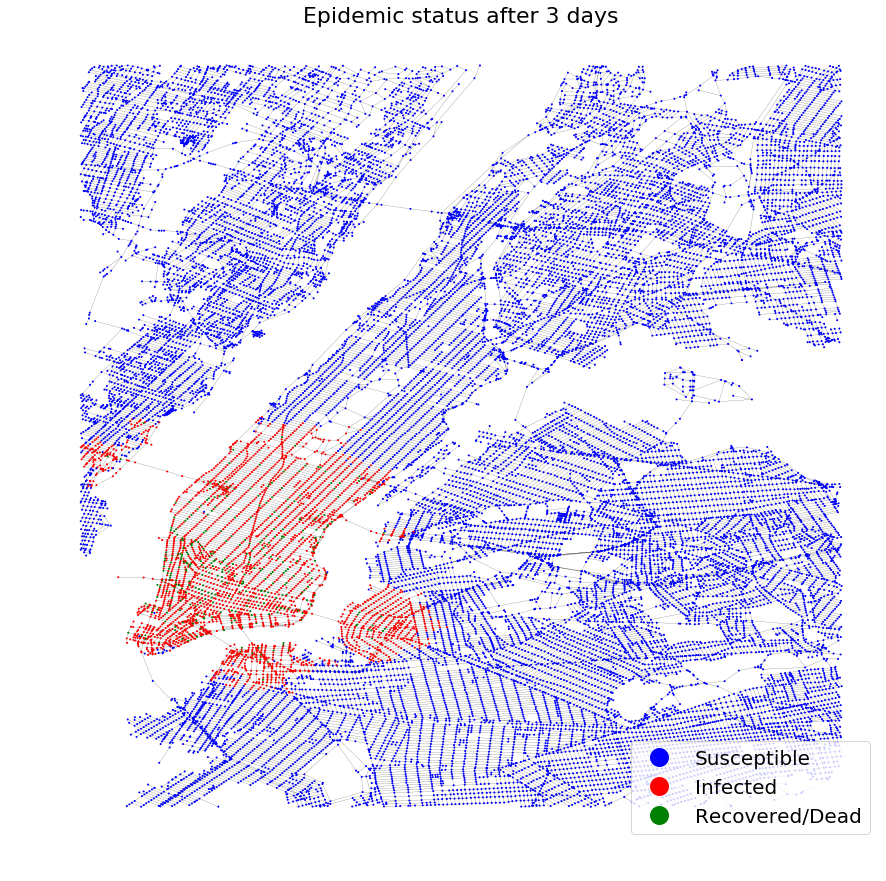

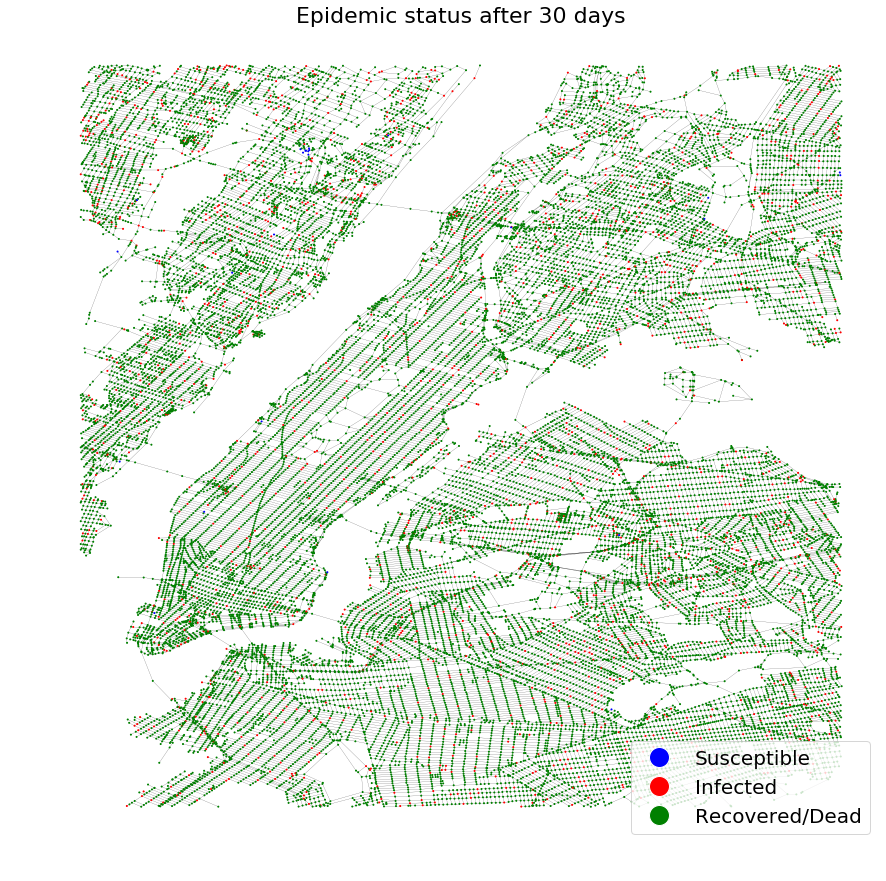

In [20]:
plt.figure(figsize=(15,15)) 
nx.draw(G,pos, node_size=1,width=0.15,node_color=color(G, 1, list_infected , list_susceptible))
plt.title("Epidemic status after 1 day",fontsize=22)
plt.legend(handles = legend_elements,prop={'size': 20},loc="lower right")
plt.show()
plt.figure(figsize=(15,15))
plt.title("Epidemic status after 3 days",fontsize=22)
nx.draw(G,pos, node_size=1,width=0.15,node_color=color(G, 3, list_infected , list_susceptible))
plt.legend(handles = legend_elements,prop={'size': 20},loc="lower right")
plt.show()
plt.figure(figsize=(15,15))
plt.title("Epidemic status after 30 days",fontsize=22)
nx.draw(G,pos, node_size=1,width=0.15,node_color=color(G, 30, list_infected , list_susceptible))
plt.legend(handles = legend_elements,prop={'size': 20},loc="lower right")
plt.show()


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [7]:
G_random = G.copy()
for i in range(1000):
    random_edge = choice(list(G_random.edges))
    G_random.remove_edge(random_edge[0], random_edge[1])

In [8]:
sir_random = epidemics_helper.SimulationSIR(G_random, beta=10.0, gamma=0.1)
sir_random.launch_epidemic(source=choice(list(G_random.nodes)), max_time=MAX_DAYS)

Epidemic stopped after 100.48 days | 100.48 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered


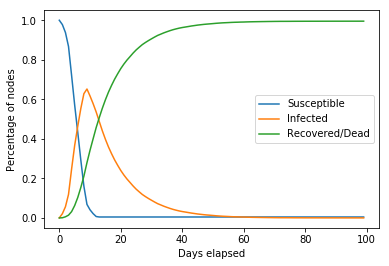

In [28]:
lists_random = status_list(MAX_DAYS, sir_random)

list_susceptible_random = lists_random[0]
list_infected_random = lists_random[1]
list_recovered_random = lists_random[2]

nb_susceptible_random = list(map(lambda x : len(x) / len(G.nodes), list_susceptible_random))
nb_recovered_random = list(map(lambda x : len(x) / len(G.nodes), list_recovered_random))
nb_infected_random = list(map(lambda x : len(x) / len(G.nodes), list_infected_random))



plt.plot(nb_susceptible_random, label="Susceptible")
plt.plot(nb_infected_random, label="Infected")
plt.plot(nb_recovered_random, label="Recovered/Dead")
plt.xlabel("Days elapsed")
plt.ylabel("Percentage of nodes")
plt.legend()
plt.show()

In [6]:
#WARNING : Expensive calculations
sum_susceptible = 0
sum_recovered = 0
sum_infected = 0

for j in range(10):
    G_random = G.copy()
    for i in range(1000):
        random_edge = choice(list(G_random.edges))
        G_random.remove_edge(random_edge[0], random_edge[1])

    sir_random = epidemics_helper.SimulationSIR(G_random, beta=10.0, gamma=0.1)
    sir_random.launch_epidemic(source=choice(list(G_random.nodes)), max_time=MAX_DAYS)
    lists_random = status_list(MAX_DAYS, sir_random)

    list_susceptible_random = lists_random[0]
    list_infected_random = lists_random[1]
    list_recovered_random = lists_random[2]
    sum_susceptible += len(list_susceptible_random[30])
    sum_recovered += len(list_recovered_random[30])
    sum_infected += len(list_infected_random[30])
print("On average, "+str(sum_susceptible / 10) + " people are susceptible after 30 days.")
print("On average, "+str(sum_infected / 10) + " people are infected after 30 days.")
print("On average, "+str(sum_recovered / 10) + " people are recovered/dead after 30 days.")

Epidemic stopped after 101.43 days | 101.43 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 100.79 days | 100.79 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 104.29 days | 104.29 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 102.35 days | 102.35 days elapsed | 0.3% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 97.96 days | 97.96 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 105.92 days | 105.92 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 106.97 days | 106.97 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 118.12 days | 118.12 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 101.97 days | 101.97 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 102.58 

As we can see on this graph, removing edges at random is not very effective. After 30 days, almost everybody is already dead.

In [22]:
#WARNING : Expensive calculation
G_random2 = G.copy()
for i in range(10000):
    if i % 500 == 0:
        print("Progress : " + str(i))
    random_edge = choice(list(G_random2.edges))
    G_random2.remove_edge(random_edge[0], random_edge[1])

Progress : 0
Progress : 500
Progress : 1000
Progress : 1500
Progress : 2000
Progress : 2500
Progress : 3000
Progress : 3500
Progress : 4000
Progress : 4500
Progress : 5000
Progress : 5500
Progress : 6000
Progress : 6500
Progress : 7000
Progress : 7500
Progress : 8000
Progress : 8500
Progress : 9000
Progress : 9500


In [23]:
sir_random2 = epidemics_helper.SimulationSIR(G_random2, beta=10.0, gamma=0.1)
sir_random2.launch_epidemic(source=choice(list(G_random2.nodes)), max_time=MAX_DAYS)

Epidemic stopped after 100.13 days | 100.13 days elapsed | 24.2% susceptible, 0.0% infected, 75.7% recovered


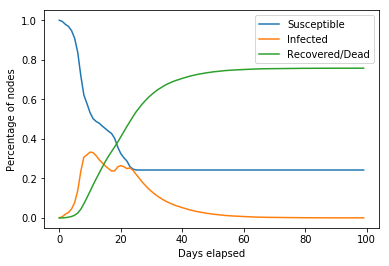

In [24]:
lists_random2 = status_list(MAX_DAYS, sir_random2)

list_susceptible_random2 = lists_random2[0]
list_infected_random2 = lists_random2[1]
list_recovered_random2 = lists_random2[2]


nb_susceptible_random2 = list(map(lambda x : len(x) / len(G.nodes), list_susceptible_random2))
nb_recovered_random2 = list(map(lambda x : len(x) / len(G.nodes), list_recovered_random2))
nb_infected_random2 = list(map(lambda x : len(x) / len(G.nodes), list_infected_random2))



plt.plot(nb_susceptible_random2, label="Susceptible")
plt.plot(nb_infected_random2, label="Infected")
plt.plot(nb_recovered_random2, label="Recovered/Dead")
plt.xlabel("Days elapsed")
plt.ylabel("Percentage of nodes")
plt.legend()
plt.show()


As we can see here, the number of people infected is limited, but the price to pay is too heavy. Removing edges at random is definitely not the best solution.
The reason of this plateau behavior is that the graph is no longer connected, because some key edges were removed. We will use this property of "key node" in the strategy 2

#### Exercise 2.11: Strategy 2

Explanations :
Our main idea is to separate huge group of nodes that are linked together with only few nodes. Looking at the previous graph, we see that there is 3 "main group" and they're connected 2 by 2 with thin bonds made from nodes with only 2 edges.
To do this, we detect thoses nodes by their degrees and delete the edge coming from an "island" (or going) to another "island" ("islands" are the huge group of nodes)
Here is an example :
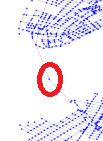

Now, we "just" have to remove edges connected to a similar node as the one in example.

Edges removed : 2766
Number of connected components : 779


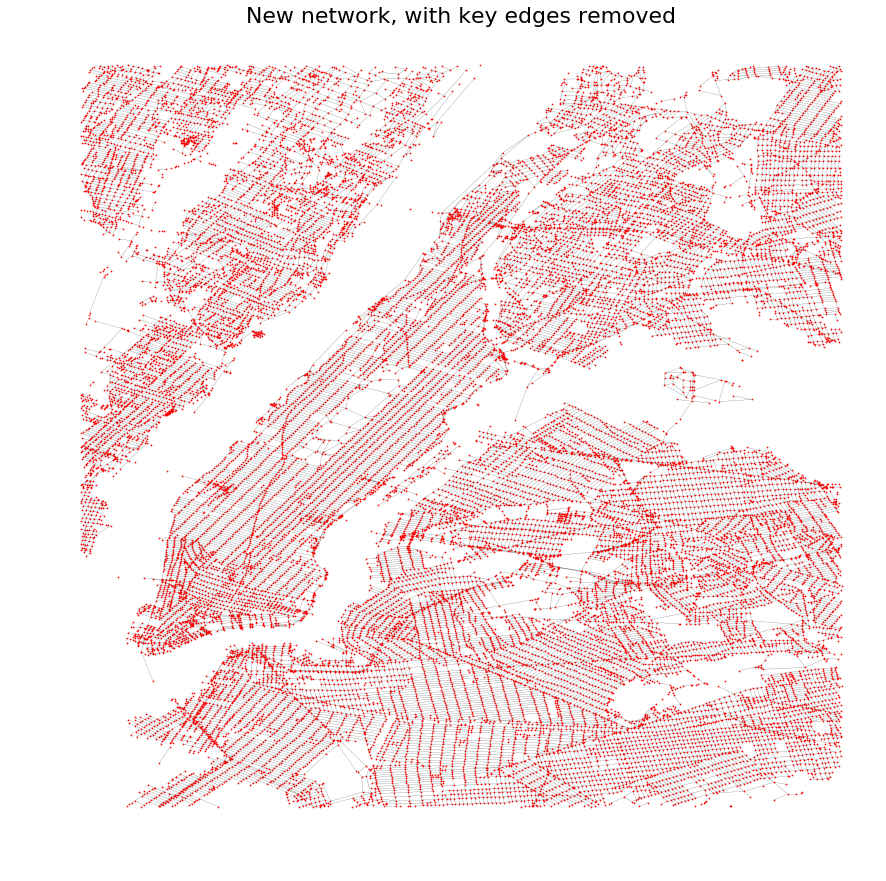

In [13]:
nodes = G.nodes
degrees = G.degree
targeted_nodes = []
removables_edges = []
for i in range(0, len(nodes)):
    if degrees[i] == 2:
        targeted_nodes.append(nodes[i])
for t_n in targeted_nodes:
    neighbors = list(G.neighbors(t_n["id"]))[0]
    removables_edges.append((t_n["id"], neighbors))
G2 = G.copy()
G2.remove_edges_from(removables_edges)
print("Edges removed : " + str(len(removables_edges)))

print("Number of connected components : " + str(len(list(nx.connected_components(G2)))))

plt.figure(figsize=(15,15))
plt.title("New network, with key edges removed", fontsize=22)
nx.draw(G2,pos, node_size=0.5,width=0.15)

In [14]:
sir2 = epidemics_helper.SimulationSIR(G2, beta=10.0, gamma=0.1)
sir2.launch_epidemic(source=choice(list(G2.nodes)), max_time=MAX_DAYS)

Epidemic stopped after 83.89 days | 83.89 days elapsed | 88.9% susceptible, 0.0% infected, 11.1% recovered


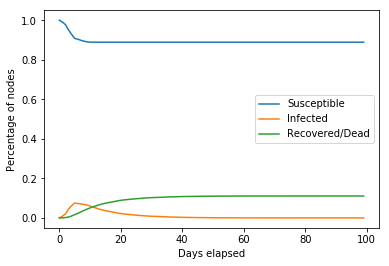

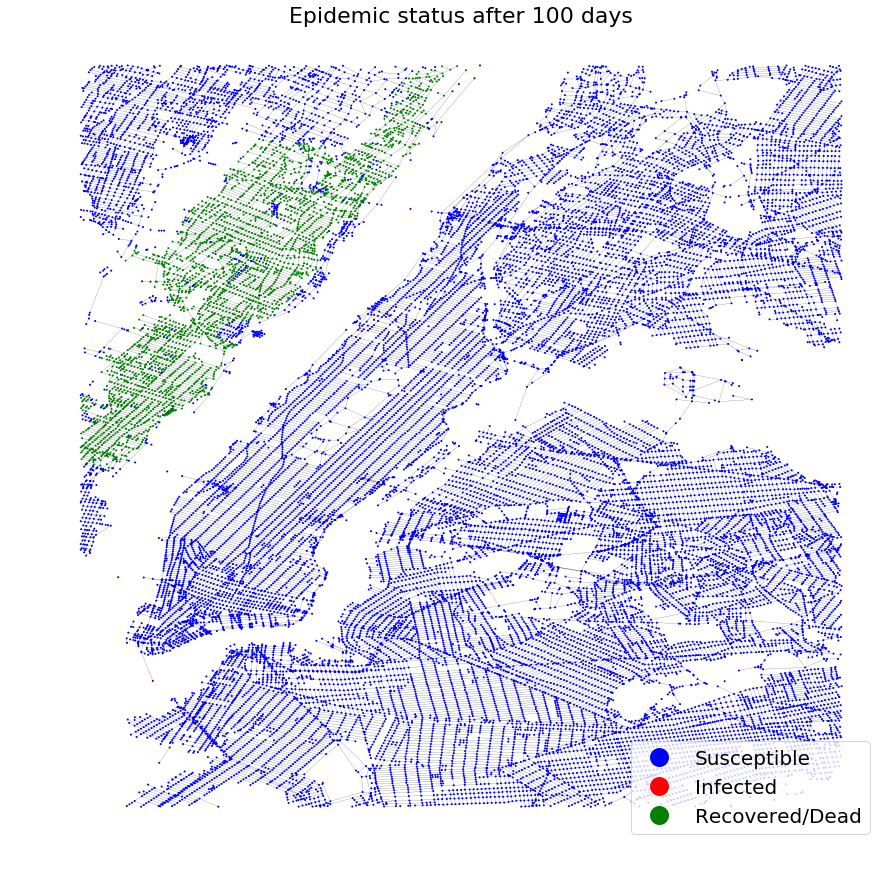

In [16]:
lists2 = status_list(MAX_DAYS, sir2)

list_susceptible2 = lists2[0]
list_infected2 = lists2[1]
list_recovered2 = lists2[2]


nb_susceptible2 = list(map(lambda x : len(x) / len(G.nodes), list_susceptible2))
nb_recovered2 = list(map(lambda x : len(x) / len(G.nodes), list_recovered2))
nb_infected2 = list(map(lambda x : len(x) / len(G.nodes), list_infected2))



plt.plot(nb_susceptible2, label="Susceptible")
plt.plot(nb_infected2, label="Infected")
plt.plot(nb_recovered2, label="Recovered/Dead")
plt.xlabel("Days elapsed")
plt.ylabel("Percentage of nodes")
plt.legend()
plt.show()

plt.figure(figsize=(15,15)) 
plt.legend(handles = legend_elements,prop={'size': 20},loc="lower right")
plt.title("Epidemic status after 100 days",fontsize=22)
nx.draw(G2,pos, node_size=1,width=0.15,node_color=color(G2, 99, list_infected2 , list_susceptible2))

In [94]:
#WARNING : Expensive calculation
sum2 = 0
sir3 = epidemics_helper.SimulationSIR(G2, beta=10.0, gamma=0.1, verbose = False)
for i in range(1000):
    if i % 100 == 0:        
        print("Progress : " + str(i))
    sir3.launch_epidemic(source=choice(list(G2.nodes)), max_time=MAX_DAYS)    
    sum2 += (sum(sir3.status == 0)/len(sir3.status))
print(str((sum2/1000) * 100) + "%")


Progress : 0
Progress : 100
Progress : 200
Progress : 300
Progress : 400
Progress : 500
Progress : 600
Progress : 700
Progress : 800
Progress : 900
75.98267059401077%


As we can now see, by removing 2766 edges, we can save on average approximately 75% of the people, over 1000 simulations.

We can compute a more precise average assuming the following.
* The epidemic will eventually kill all people inside the connected component it started in.
We can then compute an expected value of saved people like this.
Let $G(E,V)$ be the network with $n$ connected components of size $s_n$ for $i=0,...,n$ .
An epidemic has $\frac{s_i}{|E|}$ chances to start in component $i$, and to kill $s_i$ people, i.e to save $\frac{|E|-s_i}{|E|} * |E| $ people.
By doing this this over all connected components, we get the following formula 
$$
\sum_{i=0}^{n} \frac{s_i}{|E|} * \frac{1-s_i}{|E|}
$$

In [24]:
size_tot = len(G2.nodes)
size_cc = [len(cc) for cc in nx.connected_components(G2)]
avg_per_cc = [(size/size_tot) * (1-size/size_tot) for size in size_cc]
print(str(sum(avg_per_cc) * 100) + "%")

76.67003495523825%


Theoretically, we save on average 76.6% of the population